# EDA (Exploratory Data Analysis)

#### Importing the cleaned data set and required packages
To see how this data was cleaned, look at the EDA-Cleaning.ipynb file

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
from scripts import project_functions # This is called a relative import

df = project_functions.load_and_process('../data/raw/winemag-data.csv')

df.head()

,Country,Points,Price,Province,Region,Name,Variety,Winery
0,US,87,14.0,Oregon,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,US,87,13.0,Michigan,Lake Michigan Shore,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
2,US,87,65.0,Oregon,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
3,France,87,24.0,Alsace,Alsace,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
4,France,87,27.0,Alsace,Alsace,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


## Questions to answer through Exploration: 

#### Initial Questions I made in Milestone 1:
1. How is the price of wine related to its quality score? 
2. What country produces the highest scoring wine? 
3. What are the top ten most expensive regions for producing wine?

#### Questions I need to explore before analyzing:
- What variables have correlations with eachother?
- What variables are the most important when determining price or points?
- What types of visualizations are easy to interpret and give me a good insight into the data?

## Correlation Matrix
#### Plotting a heatmap to see any correlations between variables

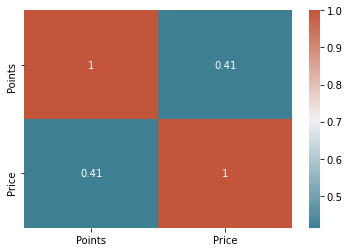

In [9]:
corr = df.corr()# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, 
            annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

There is a positive correlation between price and points. As the price increases, so does the points that the wine scored. This is as expected.

## Scatter Plot
#### Now I will look further into the correlation between price and points

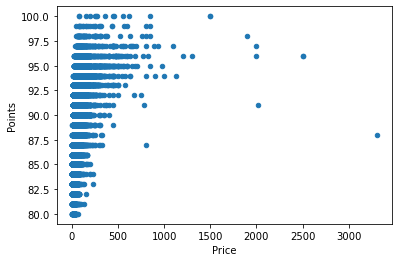

In [10]:
df.plot(kind='scatter', x='Price', y='Points')

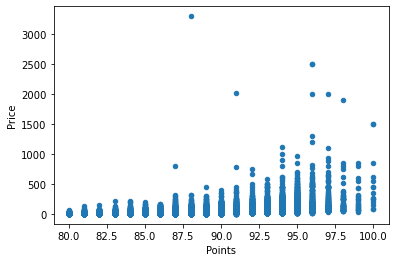

In [11]:
df.plot(kind='scatter', x='Points', y='Price')

It is easier to read the scatter plot when it is Points in the horizontal axis and Price in the vertical axis. We can see the although as points increases, there are more wines that have a larger price. However, there are almost always wines with high Points that still maintain a low Price.

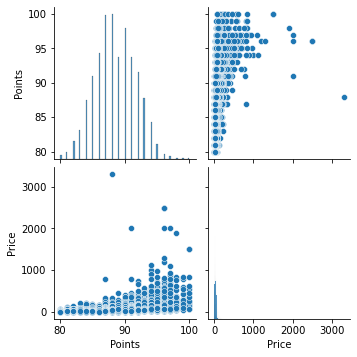

In [12]:
sns.pairplot(df)

Although the points are Normally Distributed, the prices are generally low.

## Histograms
#### Now we will take a look at comparing the Numerical Data (Price/Points) in Comparison to the NonNumerical Data (Country, Region, Variety etc.)

Text(0.5, 1.0, 'Countries')

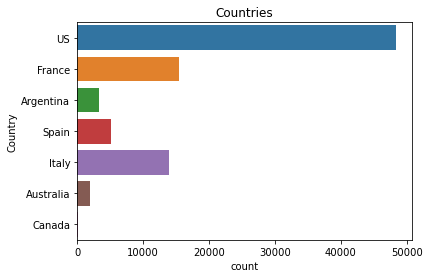

In [17]:
sns.countplot(data=df, y='Country').set_title("Countries")

There is lots of data for the top six countries: US, France, Argentina, Spain, Italy, Austrialia.

Text(0.5, 0, 'Count')

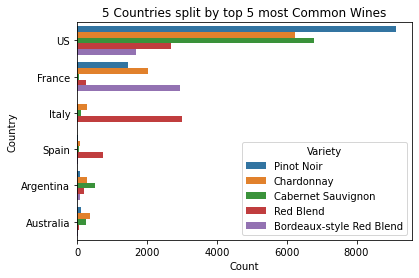

In [22]:
df2 = df.dropna()
sns.countplot(data=df2, 
              y='Country',
              order= df2['Country'].value_counts().index[:6],
             hue= 'Variety',
              hue_order = df2['Variety'].value_counts().index[:5]
             ).set_title("5 Countries split by top 5 most Common Wines")
plt.xlabel('Count')

This tells us which wine variety is most common in each country

Text(0.5, 0, 'Count')

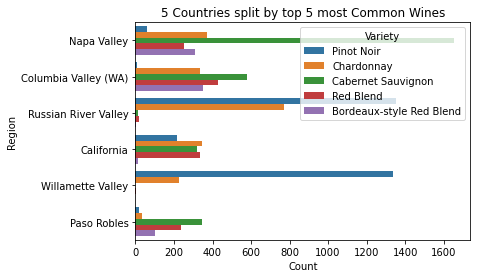

In [28]:

sns.countplot(data=df, 
              y='Region',
              order= df['Region'].value_counts().index[:6],
             hue= 'Variety',
              hue_order = df['Variety'].value_counts().index[:5]
             ).set_title("5 Countries split by top 5 most Common Wines")
plt.xlabel('Count')

## New Questions I have after looking at these initial graphs:
1. What is the maximum wine score in each country and region?
2. What wine has the highest price, but lowest score? What wine has the highest score, but lowest price?
3. What is the highest scoring wine in each country compared to their most commonly made wine?

Text(0.5, 0, 'Count')

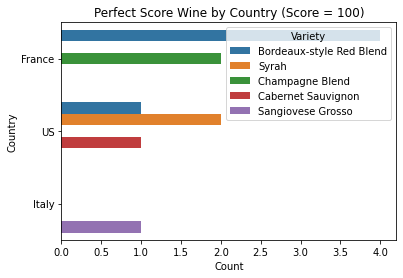

In [35]:
PS = df[ df['Points'].max() == df['Points'] ]
# These are wines that get a maximum score of 100

sns.countplot(data=PS, 
              y='Country',
              order= PS['Country'].value_counts().index[:6],
             hue= 'Variety',
              hue_order = PS['Variety'].value_counts().index[:5]
             ).set_title("Perfect Score Wine by Country (Score = 100)")
plt.xlabel('Count')

Text(0.5, 0, 'Count')

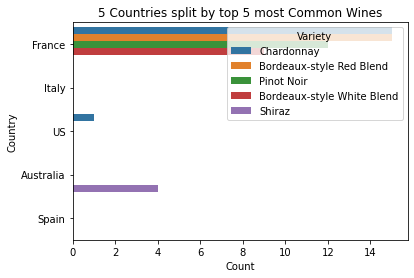

In [34]:
HP = df[ df['Price'] > 500 ]
# These are wines that have a price over 2000
sns.countplot(data=HP, 
              y='Country',
              order= HP['Country'].value_counts().index[:6],
             hue= 'Variety',
              hue_order = HP['Variety'].value_counts().index[:5]
             ).set_title("Wines over $500 by country")
plt.xlabel('Count')

I can see from these that France has both the highest scoring wine, and the highest price wine. Also US wine scores high, it is not as expensive.

## Making more Charts for analysis

#### Now I am going to create some data sets that will help me look at the Countries, Varieties, and Regions with the highest Prices and Points.

In [41]:
avgPPV = df.groupby('Variety').mean()
# This data set has average points and price by variety

avgPPC = df.groupby('Country').mean()
# This data set has average points and price by Country

In [48]:
avgPPV.sort_values(by = 'Price', ascending = False)

,Points,Price
Variety,,
Champagne Blend,89.726527,72.052871
Nebbiolo,90.414770,66.414306
Sangiovese Grosso,90.849541,65.319266
Cabernet Sauvignon,88.838997,51.775294
Pinot Noir,89.585071,49.615427
...,...,...
Pinot Grigio,86.209945,16.690608
Bonarda,86.391753,16.391753
Verdejo,86.272727,16.166667


In [47]:
avgPPV.sort_values(by = 'Points', ascending = False)

,Points,Price
Variety,,
Sangiovese Grosso,90.849541,65.319266
Nebbiolo,90.414770,66.414306
Nerello Mascalese,89.833333,42.147059
Tannat,89.810000,35.900000
Champagne Blend,89.726527,72.052871
...,...,...
Verdejo,86.272727,16.166667
Pinot Grigio,86.209945,16.690608
Garnacha,85.889251,22.286645


## Variety:
#### Highest Average Price: Champagne Blend
#### Highest Average Points: Sangiovese Grosso

In [49]:
avgPPC.sort_values(by = 'Price', ascending = False)

,Points,Price
Country,,
France,88.752551,42.968614
Italy,88.736044,41.300959
US,88.588378,36.970902
Australia,88.536498,35.125574
Canada,89.324742,33.840206
Spain,87.252259,27.702947
Argentina,86.617817,24.163880


In [51]:
avgPPC.sort_values(by = 'Points', ascending = False)

,Points,Price
Country,,
Canada,89.324742,33.840206
France,88.752551,42.968614
Italy,88.736044,41.300959
US,88.588378,36.970902
Australia,88.536498,35.125574
Spain,87.252259,27.702947
Argentina,86.617817,24.163880


## Country:
#### Highest average Price: France
#### Highest average Points: Canada

Interesting Notes:
- Why does Canada have the highest average Points, when in the histogram, it seemed that France did?
- How does the averages compare to the ranges/max/min of price?

#### I am going to make some pivot tables for further exploration

In [74]:
top5avgPriceWines = avgPPV.sort_values(by = 'Price', ascending = False)[:5]
top5avgPriceWines = ['Champagne Blend','Nebbiolo','Sangiovese Grosso',
                     'Cabernet Sauvignon','Pinot Noir']
df_top5Price = df[df['Variety'].isin(top5avgPriceWines)]

pricePivot = df_top5Price.pivot_table(index=['Country','Variety'],values=['Price'],aggfunc='mean')

Price
Country   Variety                      
Argentina Cabernet Sauvignon  19.694779
          Champagne Blend     22.571429
          Nebbiolo            63.666667
          Pinot Noir          23.500000
Australia Cabernet Sauvignon  35.794466
          Champagne Blend     23.500000
          Pinot Noir          32.400000
Canada    Cabernet Sauvignon  48.833333
          Pinot Noir          32.809524
France    Cabernet Sauvignon  17.673469
          Champagne Blend     77.914849
          Pinot Noir          84.372428
Italy     Cabernet Sauvignon  45.324074
          Champagne Blend     24.900000
          Nebbiolo            67.157769
          Pinot Noir          24.500000
          Sangiovese Grosso   65.356618
Spain     Cabernet Sauvignon  32.604167
          Champagne Blend     10.769231
          Pinot Noir          19.818182
US        Cabernet Sauvignon  55.217058
          Champagne Blend     34.114583
          Nebbiolo            36.576923
          Pinot Noir          44.643381
          Sangiovese Grosso   45.000000

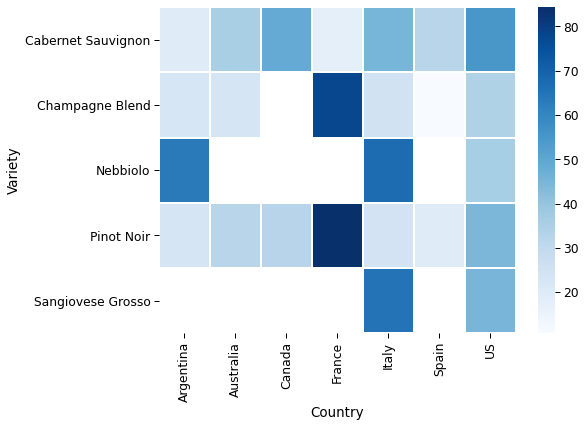

In [77]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

heat = pricePivot.pivot_table(index='Variety', columns='Country', values='Price')
# You can separate data with lines
sns.heatmap(heat, cmap='Blues', linecolor='white', linewidth=1)

In [82]:
top5avgPointWines = avgPPV.sort_values(by = 'Points', ascending = False)[:5]
top5avgPointWines = ['Nerello Mascalese','Nebbiolo','Sangiovese Grosso',
                   'Champagne Blend','Tannat']
df_top5Price = df[df['Variety'].isin(top5avgPriceWines)]

pricePivot = df_top5Price.pivot_table(index=['Country','Variety'],values=['Points'],aggfunc='mean')


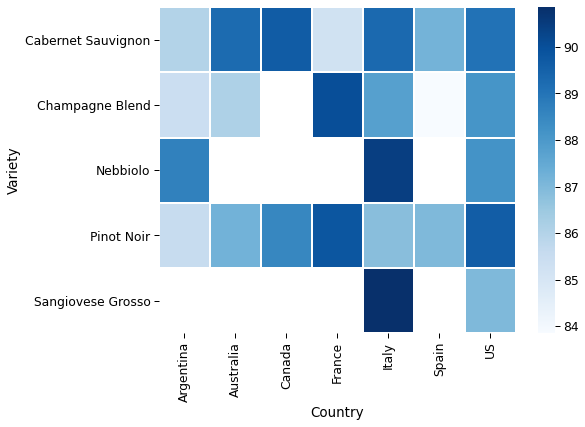

In [83]:
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)

heat = pricePivot.pivot_table(index='Variety', columns='Country', values='Points')
# You can separate data with lines
sns.heatmap(heat, cmap='Blues', linecolor='white', linewidth=1)

## Conclusions to be made from the heat maps:
#### 1. Highest variety/country pair Price: French Pinot Noir
#### 2. Highest variety/country pair Points: Italian Sangiovese Grosso

# Learnings to take into my next step: Analysis
- There are too many wine varieties to look at them all so it is best to look at the top 5
- Price correlates to Points, but there are still some wine varieties that have low prices but high points
- Heat maps are very useful for visualizing/comparing 2 pieces of nonnumerical data with one piece of numerical data